In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/users/raunakchhabra/dataset/creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]

target = "Class"

state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [5]:
data.isnull().values.any()

False

In [6]:
fraud = data[data['Class']==1]

valid = data[data['Class']==0]

In [7]:
print(fraud.shape,valid.shape)

(492, 31) (284315, 31)


In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
oversample =  RandomOverSampler(sampling_strategy=0.5)

In [10]:
X_train_res, y_train_res = oversample.fit_sample(X, Y)

In [11]:
X_train_res.shape,y_train_res.shape

((426472, 30), (426472,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((298530, 30), (127942, 30))

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [16]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [17]:
y_predicted = classifier_rf.predict(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.predict(X_test))

[0 1 0 ... 1 0 0]


In [20]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = KNeighborsClassifier()

eclf = VotingClassifier(estimators=[('RF', clf1), ('LR', clf2), ('KNN', clf3)],
                        voting='soft', weights=[2,1,1])

eclf.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=42)),
                             ('LR', LogisticRegression(random_state=42)),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft', weights=[2, 1, 1])

In [21]:
y_predicted = eclf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Classifier report:\n',classification_report(y_test,y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_test,y_predicted))

Classifier report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85195
           1       1.00      1.00      1.00     42747

    accuracy                           1.00    127942
   macro avg       1.00      1.00      1.00    127942
weighted avg       1.00      1.00      1.00    127942

Confusion matrix:
 [[85187     8]
 [    0 42747]]


In [23]:
print(f'Final Training Accuracy: {eclf.score(X_train,y_train)*100}%')

Final Training Accuracy: 100.0%


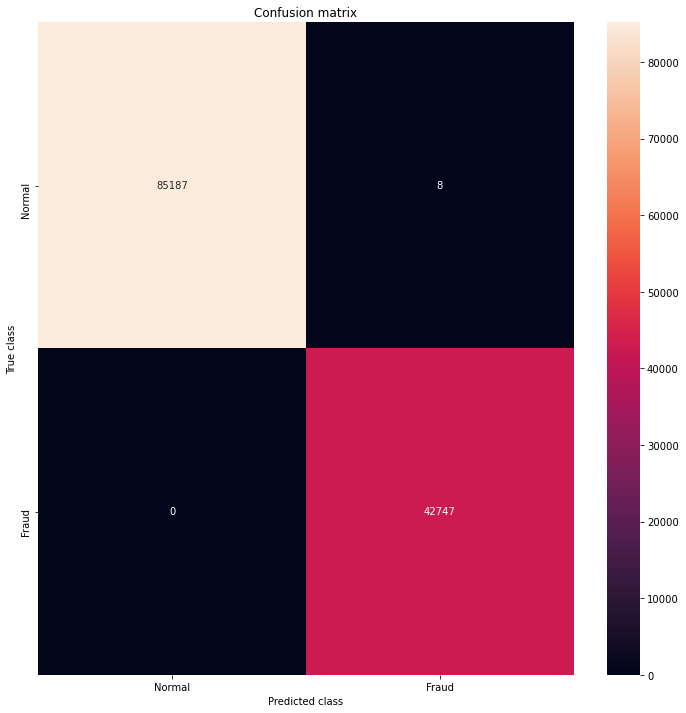

<Figure size 648x504 with 0 Axes>

<Figure size 648x504 with 0 Axes>

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

plt.figure(figsize=(9, 7))

SyntaxError: invalid syntax (<ipython-input-29-619527d3b0e5>, line 1)